In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
# Load the datasets
data = pd.read_csv("C:\\Users\\Dhvani\\Downloads\\Data.csv")  
state_data = pd.read_csv("C:\\Users\\Dhvani\\Downloads\\State_data.csv")
ncap_funding=pd.read_csv("C:\\Users\\Dhvani\\Downloads\\NCAP_Funding.csv")
print(data)
print(state_data)
print(ncap_funding)

# Convert 'Timestamp' to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

          Timestamp                           station  PM2.5        PM10  \
0        2017-01-01        32Bungalows, Bhilai - CECB    NaN         NaN   
1        2017-01-01              AIIMS, Raipur - CECB    NaN         NaN   
2        2017-01-01      Adarsh Nagar, Jaipur - RSPCB    NaN         NaN   
3        2017-01-01        Airoli, Navi Mumbai - MPCB    NaN   54.743723   
4        2017-01-01        Airport Area, Indore - IMC    NaN         NaN   
...             ...                               ...    ...         ...   
1627456  2024-12-10              Worli, Mumbai - MPCB  54.71  124.420000   
1627457  2024-12-10  Yamunapuram, Bulandshahr - UPPCB  53.23  101.340000   
1627458  2024-12-10   Yerramukkapalli, Kadapa - APPCB  75.00  110.750000   
1627459  2024-12-10  Zero Point GICI, Gangtok - SSPCB    NaN         NaN   
1627460  2024-12-10       Zoo Park, Hyderabad - TSPCB  72.83  176.480000   

                                                   address         city  \
0        Bhi

### Spatial Aggregation

In [160]:
# 1 Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

# Group by state and calculate the average PM2.5
pm25 = data.groupby('state')['PM2.5'].mean().reset_index()
highest_pm25 = pm25.loc[pm25['PM2.5'].idxmax()]

print("State with the highest average PM2.5 concentration:")
print(highest_pm25)

State with the highest average PM2.5 concentration:
state         Delhi
PM2.5    104.100918
Name: 6, dtype: object


In [161]:
# 2 Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

air_quality_2023 = data[data['Timestamp'].dt.year == 2023]
hazardous_2023 = air_quality_2023[air_quality_2023['PM2.5'] > 300] # Filter for hazardous days (PM2.5 > 300)

# Group by state and count the number of hazardous days
hazardous = hazardous_2023.groupby('state').size().reset_index(name='hazardous_days')
most_hazardous = hazardous.loc[hazardous['hazardous_days'].idxmax()]

print("\nState with the most hazardous PM2.5 days in 2023:")
print(most_hazardous)


State with the most hazardous PM2.5 days in 2023:
state             Delhi
hazardous_days      470
Name: 3, dtype: object


In [162]:
# 3 Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

# Calculate variability (standard deviation) of PM2.5 levels for each station in 2023
pm25_variability = air_quality_2023.groupby(['state', 'station'])['PM2.5'].std().reset_index()

# Group by state and calculate the average variability
state_variability = pm25_variability.groupby('state')['PM2.5'].mean().reset_index()
highest_variability = state_variability.loc[state_variability['PM2.5'].idxmax()]

print("\nState with the highest variability in PM2.5 levels in 2023:")
print(highest_variability)


State with the highest variability in PM2.5 levels in 2023:
state        Delhi
PM2.5    79.972937
Name: 6, dtype: object


In [163]:
# 4 Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

# Filter data for the Covid period (2020-2021)
covid_data = data[(data['Timestamp'].dt.year >= 2020) & (data['Timestamp'].dt.year <= 2021)]

# Group by state and calculate the average PM2.5
pm25_covid = covid_data.groupby('state')['PM2.5'].mean().reset_index()
lowest_avg_pm25 = pm25_covid.loc[pm25_covid['PM2.5'].idxmin()]

print("\nState with the lowest average PM2.5 levels during the Covid period (2020-2021):")
print(lowest_avg_pm25)


State with the lowest average PM2.5 levels during the Covid period (2020-2021):
state     Mizoram
PM2.5    14.32335
Name: 18, dtype: object


### Temporal Aggregation

In [164]:
# 1 Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

# Filter data for August 2020
august = data[(data['Timestamp'].dt.year == 2020) & (data['Timestamp'].dt.month == 8)]

highest_pm25 = august.loc[august['PM2.5'].idxmax()]

print("Station with the highest PM2.5 in August 2020:")
print(highest_pm25[['station', 'PM2.5']])

Station with the highest PM2.5 in August 2020:
station    Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
PM2.5                                             805.51
Name: 737399, dtype: object


In [165]:
# 2 For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.

# Filter data for 2018 and the specific station
station_data = data[(data["Timestamp"].dt.year == 2018) & (data["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]

# station_data = station_data.dropna(subset=["PM2.5"]) removes the Summer Data

# Define a function to assign seasons
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Post-Monsoon"

# Assign seasons based on the month
station_data = station_data.copy()  # Avoid SettingWithCopyWarning In Pandas, if you modify a subset of a DataFrame directly, it may create a "view" instead of a "copy".
station_data["Season"] = station_data["Timestamp"].dt.month.apply(get_season)

# Group by season and calculate the average PM2.5
pm25 = station_data.groupby("Season")["PM2.5"].mean().reset_index()
highest = pm25.loc[pm25["PM2.5"].idxmax()]

print("\nAverage PM2.5 by season in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB:")
print(pm25)
print("\nSeason with the highest pollution:")
print(highest)



Average PM2.5 by season in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB:
         Season      PM2.5
0       Monsoon  34.425196
1  Post-Monsoon  56.825144
2        Summer        NaN
3        Winter  67.492344

Season with the highest pollution:
Season       Winter
PM2.5     67.492344
Name: 3, dtype: object


Thought Question: Why are certain seasons generally more polluted than others?
Potential Factors:

Winter:

Temperature Inversion: Cold air traps pollutants close to the ground, leading to higher concentrations.

Increased Burning: Use of wood, coal, and other fuels for heating increases particulate matter.

Festivals: Fireworks during festivals like Diwali contribute to pollution spikes.

Summer:

Dust Storms: Dry weather and wind lead to increased dust and particulate matter.

High Temperatures: Accelerates chemical reactions, leading to the formation of secondary pollutants like ozone.

Monsoon:

Rainfall: Washes away pollutants, leading to cleaner air.

Reduced Dust: Wet conditions suppress dust and particulate matter.

Post-Monsoon:

Stubble Burning: Agricultural residue burning in states like Punjab and Haryana significantly increases pollution.

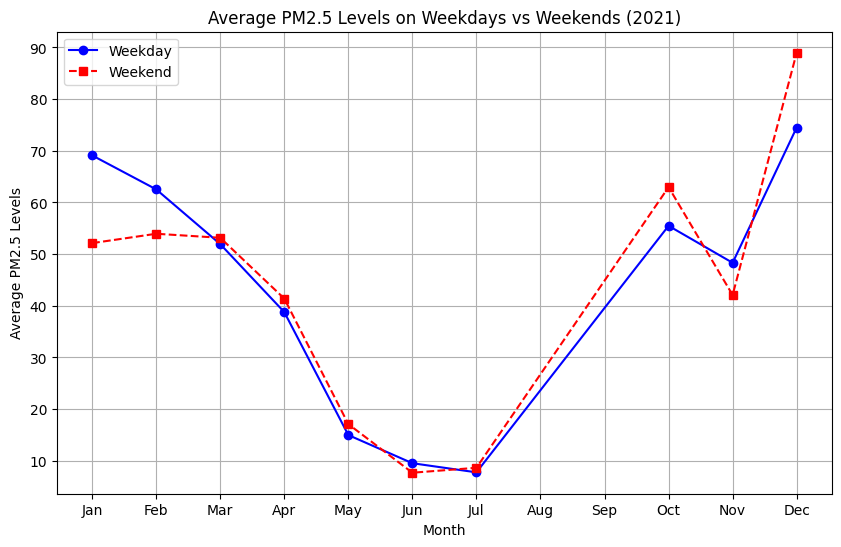

In [166]:
# 3 Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. 

# Filter data for 2021 and the specific station
data_2021 = data[(data["Timestamp"].dt.year == 2021) & (data["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]
data_2021 = data_2021.dropna(subset=["PM2.5"])

data_2021["DayType"] = data_2021["Timestamp"].dt.weekday.apply(lambda x: "Weekend" if x >= 5 else "Weekday") # Add 'DayType' column (Weekdays (0-4), Weekends (5-6))

# Group by month and day type, then calculate average PM2.5
avg_pm25 = data_2021.groupby([data_2021["Timestamp"].dt.month, "DayType"])["PM2.5"].mean().reset_index() # .dt.month already creates a proper column for months.

# Rename first column to 'Month'
avg_pm25.rename(columns={avg_pm25.columns[0]: "Month"}, inplace=True) # not required but ok
# Pivot table for easier plotting
pivot_table = avg_pm25.pivot(index="Month", columns="DayType", values="PM2.5").fillna(0)  # Replace NaNs with 0

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(pivot_table.index, pivot_table["Weekday"], label="Weekday", marker="o", linestyle="-", color="blue")
plt.plot(pivot_table.index, pivot_table["Weekend"], label="Weekend", marker="s", linestyle="--", color="red")
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Average PM2.5 Levels on Weekdays vs Weekends (2021)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()

### Spatio-temporal Aggregation 

In [167]:
# 1 For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). 

# Filter data for the year 2022
data_2022 = data[data['Timestamp'].dt.year == 2022]

def get_season(date):
    if date.month in [3, 4, 5]:
        return 'Summer'
    elif date.month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Other'

# Add a 'Season' column
# data_2022['Season'] = data_2022['Timestamp'].apply(get_season) will get warning lol!

data_2022 = data[data['Timestamp'].dt.year == 2022].copy()  # Make an explicit copy
data_2022['Season'] = data_2022['Timestamp'].apply(get_season)  # No warning now

# Filter data for summer and monsoon seasons
summer_monsoon = data_2022[data_2022['Season'].isin(['Summer', 'Monsoon'])]

# Group by state and season, then calculate average PM2.5
avg_pm25 = summer_monsoon.groupby(['state', 'Season'])['PM2.5'].mean().reset_index()

# Pivot the data 
pivot_table = avg_pm25.pivot(index='state', columns='Season', values='PM2.5')
pivot_table = pivot_table.fillna(0)

pivot_table['Percentage Change'] = ((pivot_table['Monsoon'] - pivot_table['Summer']) / pivot_table['Summer']) * 100 # Percentage change

# Find the state with the most difference (increase or decrease)
difference = pivot_table.loc[pivot_table['Percentage Change'].abs().idxmax()]

print("\nState with the most difference (increase or decrease):")
print(difference)
print("Percentage change in PM2.5 levels (Monsoon vs Summer) for each state in 2022:")
print(pivot_table)


State with the most difference (increase or decrease):
Season
Monsoon              21.872292
Summer               56.337647
Percentage Change   -61.176419
Name: Assam, dtype: float64
Percentage change in PM2.5 levels (Monsoon vs Summer) for each state in 2022:
Season               Monsoon     Summer  Percentage Change
state                                                     
Andhra Pradesh     19.355510  30.128540         -35.756894
Arunachal Pradesh  15.069892  32.116292         -53.077110
Assam              21.872292  56.337647         -61.176419
Bihar              35.642356  75.834868         -53.000042
Chandigarh         32.758585  59.695914         -45.124242
Chhattisgarh       19.871696  22.321561         -10.975330
Delhi              42.769572  95.667628         -55.293579
Gujarat            35.852728  65.113078         -44.937747
Haryana            41.922458  81.727661         -48.704688
Himachal Pradesh   38.686133  61.471943         -37.067008
Jammu and Kashmir  18.049643  

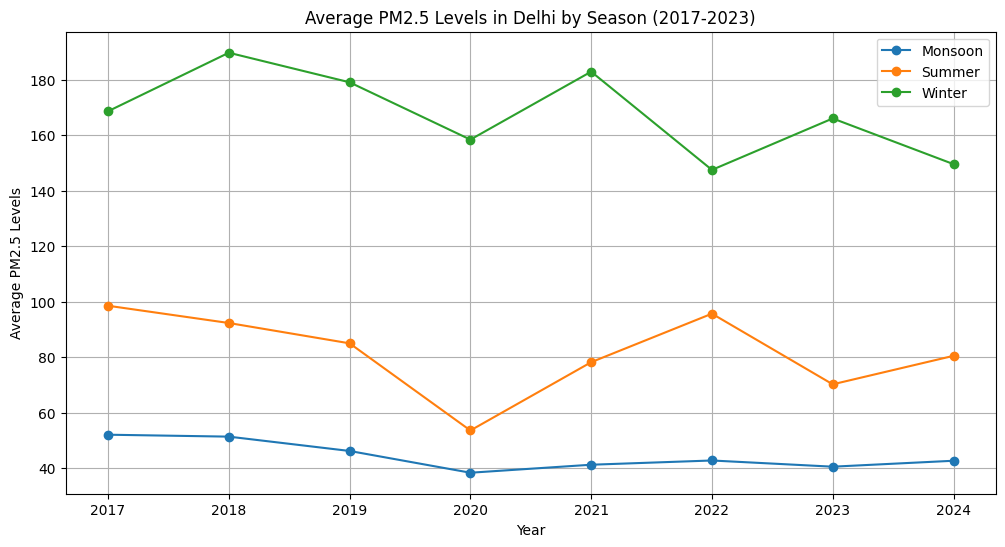

In [168]:
# 2 Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

# Filter data for Delhi
delhi_data = data[data['city'] == 'Delhi']

def season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Summer'
    elif date.month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

delhi_data = data[data['state'] == "Delhi"].copy() 
delhi_data['Season'] = delhi_data['Timestamp'].apply(season)

# Filter data for Winter, Summer, and Monsoon
delhi_seasonal_data = delhi_data[delhi_data['Season'].isin(['Winter', 'Summer', 'Monsoon'])]

# Group by year and season, then calculate average PM2.5
delhi_seasonal_avg = delhi_seasonal_data.groupby([delhi_seasonal_data['Timestamp'].dt.year, 'Season'])['PM2.5'].mean().reset_index()
delhi_seasonal_avg.rename(columns={'Timestamp': 'Year'}, inplace=True)

# Pivot 
delhi_pivot = delhi_seasonal_avg.pivot(index='Year', columns='Season', values='PM2.5')

# Plot the data
plt.figure(figsize=(12, 6))
for season in delhi_pivot.columns:
    plt.plot(delhi_pivot.index, delhi_pivot[season], label=season, marker='o')

plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.title('Average PM2.5 Levels in Delhi by Season (2017-2023)')
plt.legend()
plt.grid(True)
plt.show()

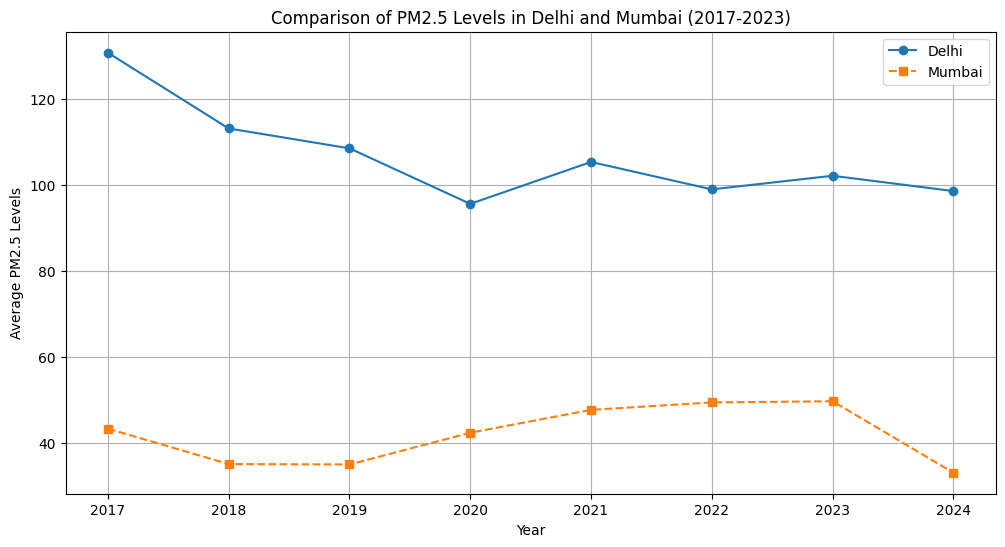


Fluctuations (Standard Deviation) in PM2.5 Levels:
Delhi: 11.33
Mumbai: 6.83
Delhi had more fluctuations in PM2.5 levels.


In [169]:
# 3 Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations?

# Filter data for Delhi and Mumbai
dm_data = data[data['city'].isin(['Delhi', 'Mumbai'])]

# Group by city and year, then calculate average PM2.5
avg_pm25 = dm_data.groupby(['city', dm_data['Timestamp'].dt.year])['PM2.5'].mean().reset_index()
avg_pm25.columns = ['City', 'Year', 'PM2.5']  # Rename columns properly

city_pivot = avg_pm25.pivot(index='Year', columns='City', values='PM2.5')
plt.figure(figsize=(12, 6))

# Check if Delhi data exists before plotting
if 'Delhi' in city_pivot.columns:
    plt.plot(city_pivot.index, city_pivot['Delhi'], label='Delhi', marker='o', linestyle='-')

# Check if Mumbai data exists before plotting
if 'Mumbai' in city_pivot.columns:
    plt.plot(city_pivot.index, city_pivot['Mumbai'], label='Mumbai', marker='s', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.title('Comparison of PM2.5 Levels in Delhi and Mumbai (2017-2023)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate fluctuations (standard deviation) 
delhi_fluctuation = city_pivot['Delhi'].std() if 'Delhi' in city_pivot.columns else None
mumbai_fluctuation = city_pivot['Mumbai'].std() if 'Mumbai' in city_pivot.columns else None

# Print fluctuations
print("\nFluctuations (Standard Deviation) in PM2.5 Levels:")
if delhi_fluctuation is not None:
    print(f"Delhi: {delhi_fluctuation:.2f}")
if mumbai_fluctuation is not None:
    print(f"Mumbai: {mumbai_fluctuation:.2f}")

# Determine which city had more fluctuations
if delhi_fluctuation and mumbai_fluctuation:
    if delhi_fluctuation > mumbai_fluctuation:
        print("Delhi had more fluctuations in PM2.5 levels.")
    else:
        print("Mumbai had more fluctuations in PM2.5 levels.")

### Population-Based

In [170]:
# 1 Which state in India has the highest number of monitoring stations relative to its population? 
station_counts = data[['state', 'station']].drop_duplicates()['state'].value_counts()

# Create a dataframe with population and station counts
density_df = pd.DataFrame({
    'population': state_data.set_index('State')['Population'],
    'stations': station_counts
}).fillna(0)

# Calculate stations per million people
density_df['stations_per_million'] = (density_df['stations'] * 1000000 / density_df['population'])

# Find state with highest density
highest_density_state = density_df['stations_per_million'].idxmax()
stations = density_df.loc[highest_density_state, 'stations']
population = density_df.loc[highest_density_state, 'population']
density = density_df.loc[highest_density_state, 'stations_per_million']

print(f"State with highest monitoring station density: {highest_density_state}")
print(f"Number of stations: {stations:.0f}")
print(f"Population: {population:,.0f}")
print(f"Stations per million people: {density:.2f}")

State with highest monitoring station density: Chandigarh
Number of stations: 3
Population: 1,055,450
Stations per million people: 2.84


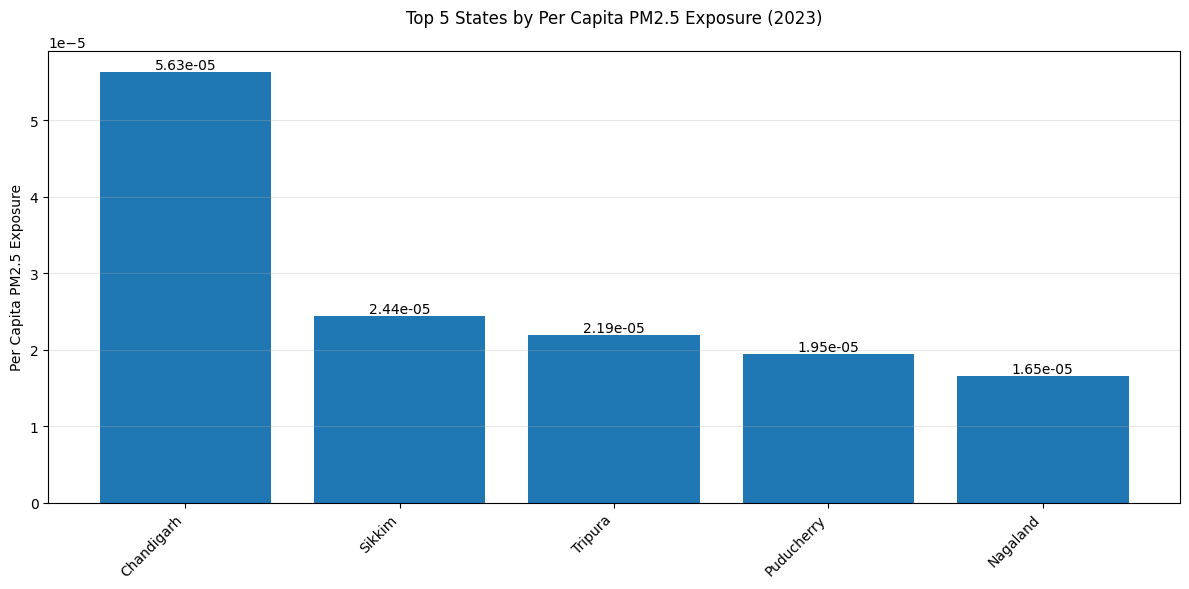


Detailed Statistics for Top 5 States:
--------------------------------------------------

Chandigarh:
Average PM2.5: 59.41 µg/m³
Population: 1,055,450
Per Capita Exposure: 5.63e-05

Sikkim:
Average PM2.5: 14.93 µg/m³
Population: 610,577
Per Capita Exposure: 2.44e-05

Tripura:
Average PM2.5: 80.47 µg/m³
Population: 3,673,917
Per Capita Exposure: 2.19e-05

Puducherry:
Average PM2.5: 24.29 µg/m³
Population: 1,247,953
Per Capita Exposure: 1.95e-05

Nagaland:
Average PM2.5: 32.72 µg/m³
Population: 1,978,502
Per Capita Exposure: 1.65e-05


In [171]:
# 2 Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

df_2023 = data[data['Timestamp'].dt.year == 2023].copy()

state_pm25 = df_2023.groupby('state')['PM2.5'].mean()

# Create DataFrame with state populations
pollution_df = pd.DataFrame({
    'PM2.5': state_pm25,
    'population': state_data.set_index('State')['Population']
})

# Calculate per capita PM2.5 exposure
pollution_df['per_capita_exposure'] = pollution_df['PM2.5'] / pollution_df['population']

# Sort and get top 5 states
top_5_states = pollution_df['per_capita_exposure'].sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_5_states)), top_5_states.values)
plt.xticks(range(len(top_5_states)), top_5_states.index, rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2e}',
             ha='center', va='bottom')
plt.title('Top 5 States by Per Capita PM2.5 Exposure (2023)', pad=20)
plt.ylabel('Per Capita PM2.5 Exposure')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nDetailed Statistics for Top 5 States:")
print("-" * 50)
for state in top_5_states.index:
    print(f"\n{state}:")
    print(f"Average PM2.5: {pollution_df.loc[state, 'PM2.5']:.2f} µg/m³")
    print(f"Population: {pollution_df.loc[state, 'population']:,.0f}")
    print(f"Per Capita Exposure: {pollution_df.loc[state, 'per_capita_exposure']:.2e}")

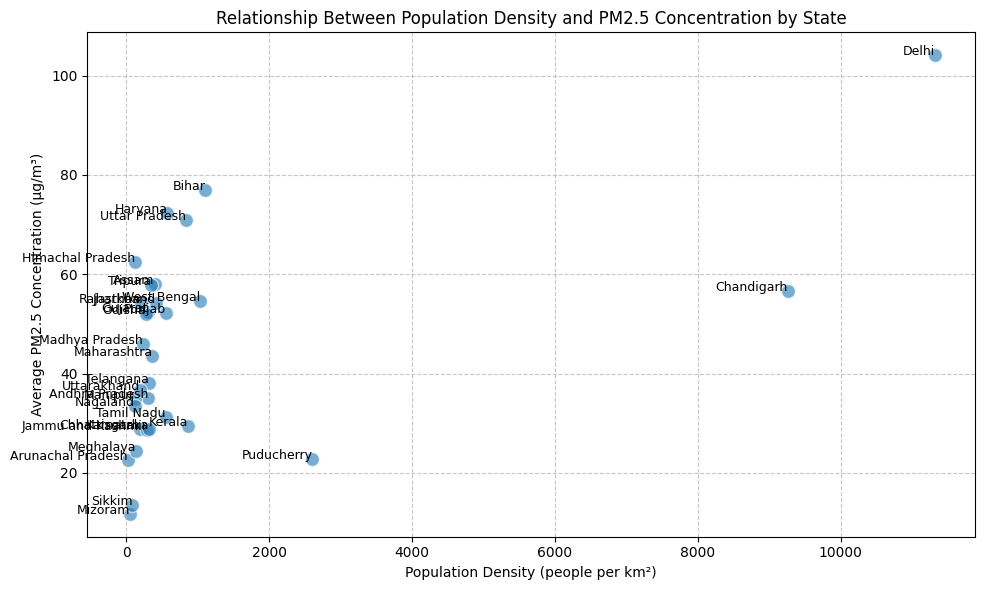

In [172]:
# 3 Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?

state_data['Population Density'] = state_data['Population'] / state_data['Area (km2)']
state_pm25 = data.groupby('state')['PM2.5'].mean().reset_index()

# Merge
merged_data = pd.merge(state_pm25, state_data, left_on='state', right_on='State', how='inner')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Population Density'], merged_data['PM2.5'], alpha=0.6, edgecolors='w', s=100)
plt.xlabel('Population Density (people per km²)')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.title('Relationship Between Population Density and PM2.5 Concentration by State')
for i, row in merged_data.iterrows():
    plt.text(row['Population Density'], row['PM2.5'], row['state'], fontsize=9, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Area Based

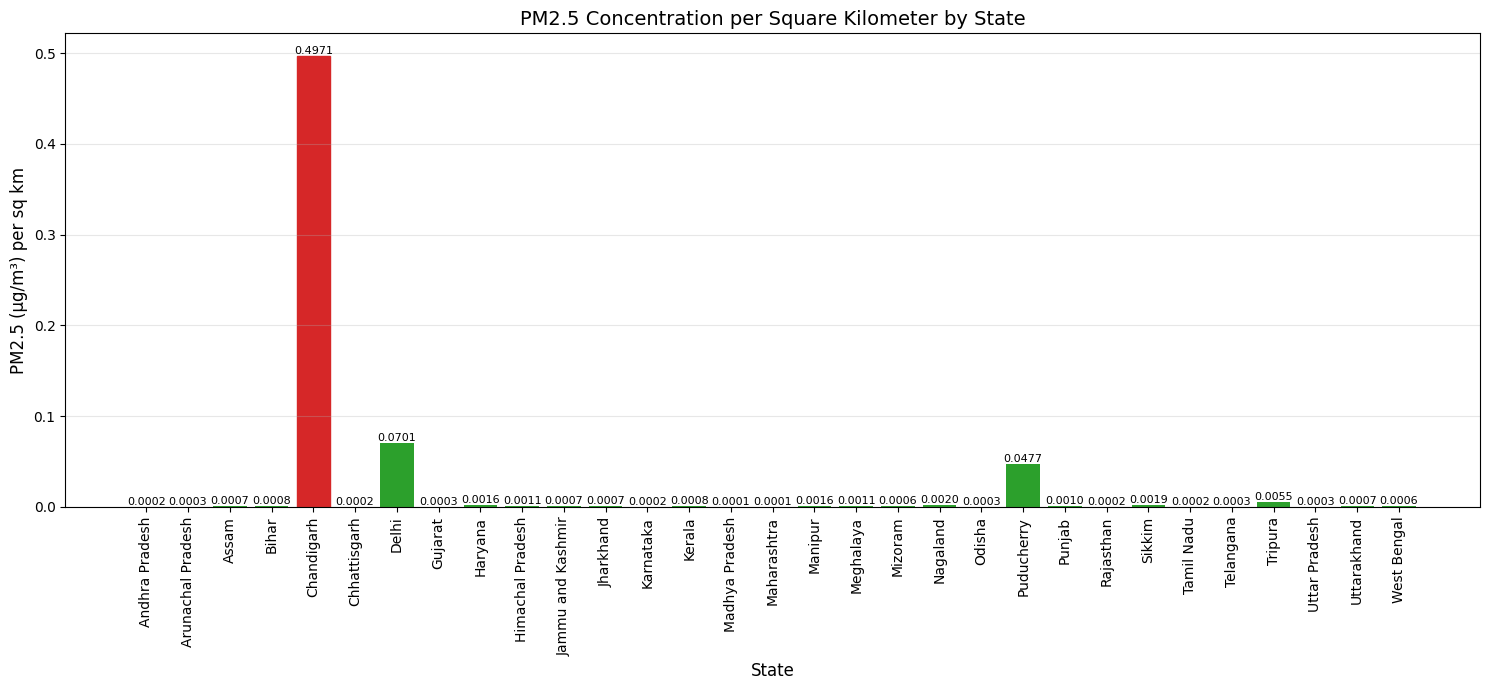

State with highest PM2.5/sq km: Chandigarh (0.50 µg/m³ per km²)


In [173]:
# 1 Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.

cleaned = data.dropna(subset=['PM2.5', 'state'])
merged = pd.merge(
    cleaned.groupby('state')['PM2.5'].mean().reset_index(),
    state_data[['State', 'Area (km2)']].rename(columns={'State': 'state', 'Area (km2)': 'area_sq_km'}),
    on='state',
    how='left'
)
merged['PM2.5_per_sq_km'] = merged['PM2.5'] / merged['area_sq_km']
merged = merged.dropna(subset=['area_sq_km'])
highest_state = merged.loc[merged['PM2.5_per_sq_km'].idxmax()]
plt.figure(figsize=(15, 7))
bars = plt.bar(merged['state'], merged['PM2.5_per_sq_km'], color='#2ca02c')
bars[merged['state'].tolist().index(highest_state['state'])].set_color('#d62728')
plt.title('PM2.5 Concentration per Square Kilometer by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('PM2.5 (µg/m³) per sq km', fontsize=12)
plt.xticks(rotation=90, ha='center')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', rotation=0, fontsize=8)
plt.show()
print(f"State with highest PM2.5/sq km: {highest_state['state']} ({highest_state['PM2.5_per_sq_km']:.2f} µg/m³ per km²)")



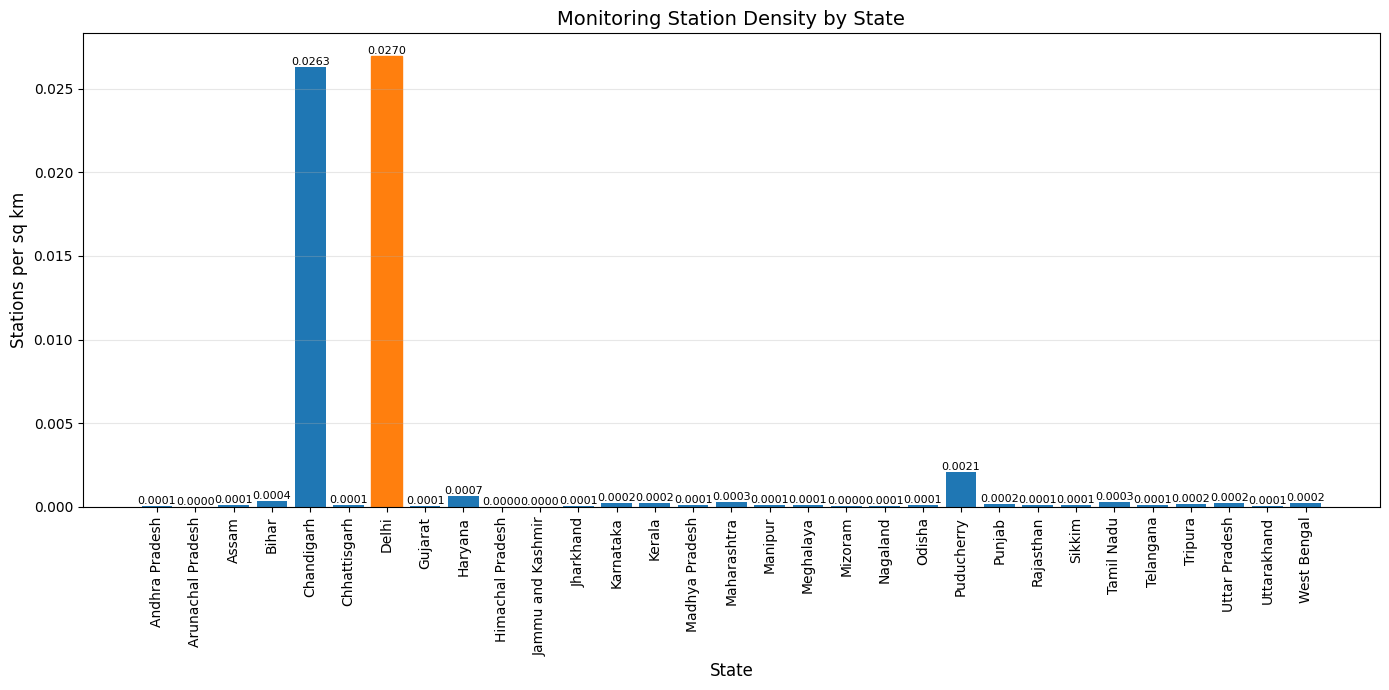

State with highest monitoring station density: Delhi (0.0270 stations/km²)


In [174]:
# 2 Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

stations_per_state = data.groupby('state')['station'].nunique().reset_index()
stations_per_state.columns = ['state', 'num_stations']
merged = pd.merge(stations_per_state,
                 state_data[['State', 'Area (km2)']].rename(columns={'State': 'state', 'Area (km2)': 'area_sq_km'}),
                 on='state',
                 how='left')
merged['stations_per_sq_km'] = merged['num_stations'] / merged['area_sq_km']
merged = merged.dropna(subset=['area_sq_km'])
highest_density = merged.loc[merged['stations_per_sq_km'].idxmax()]
plt.figure(figsize=(14, 7))
bars = plt.bar(merged['state'], merged['stations_per_sq_km'], color='#1f77b4')
bars[merged['state'].tolist().index(highest_density['state'])].set_color('#ff7f0e')
plt.title('Monitoring Station Density by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Stations per sq km', fontsize=12)
plt.xticks(rotation=90, ha='center')
plt.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
print(f"State with highest monitoring station density: {highest_density['state']} ({highest_density['stations_per_sq_km']:.4f} stations/km²)")

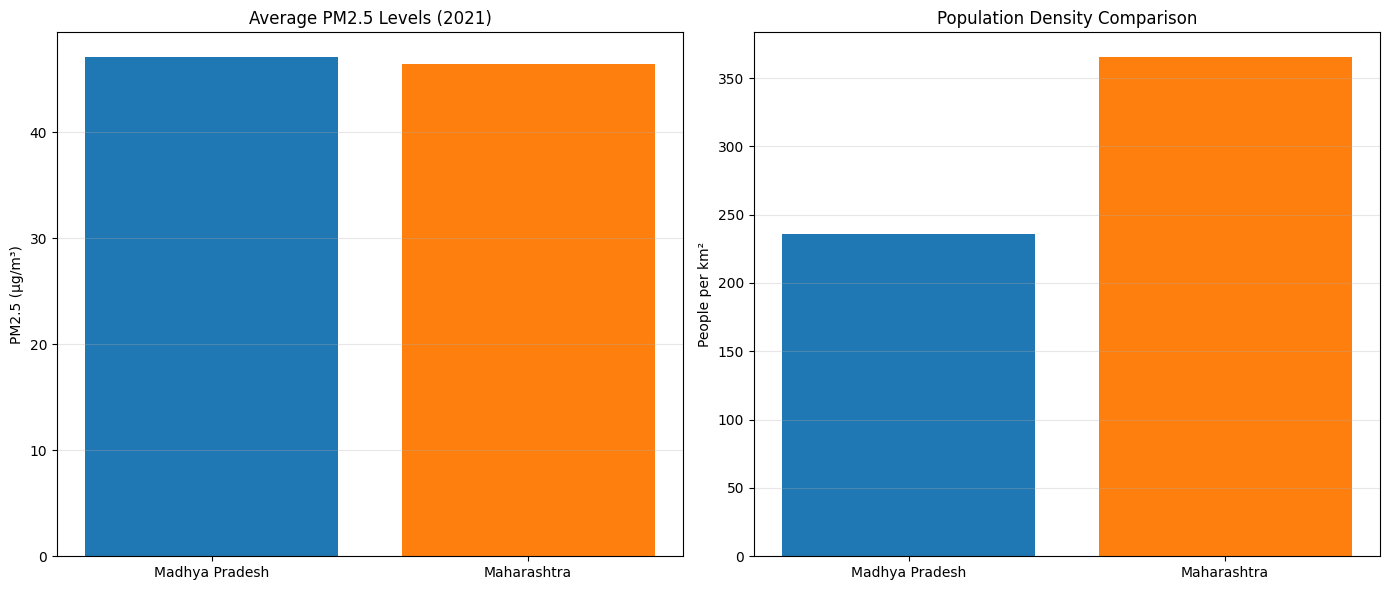

Comparative Analysis:
1. Maharashtra PM2.5: 47.10 µg/m³
   Population Density: 235.61 people/km²
2. Madhya Pradesh PM2.5: 46.44 µg/m³
   Population Density: 365.19 people/km²
Density Ratio (MH/MP): 0.65x
PM2.5 Ratio (MH/MP): 1.01x


In [175]:
# 3 Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

data['year'] = data['Timestamp'].dt.year
mask = (data['year'] == 2021) & (data['state'].isin(['Maharashtra', 'Madhya Pradesh']))

filtered = data[mask].dropna(subset=['PM2.5'])

# Average PM2.5 
pm25_avg = filtered.groupby('state')['PM2.5'].mean().reset_index()

# Population Density Calculation
pop_density = state_data[state_data['State'].isin(['Maharashtra', 'Madhya Pradesh'])].copy()
pop_density['density'] = pop_density['Population'] / pop_density['Area (km2)']
pop_density = pop_density[['State', 'density']].rename(columns={'State': 'state'})
analysis_df = pd.merge(pm25_avg, pop_density, on='state')

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.bar(analysis_df['state'], analysis_df['PM2.5'], color=['#1f77b4', '#ff7f0e'])
ax1.set_title('Average PM2.5 Levels (2021)')
ax1.set_ylabel('PM2.5 (µg/m³)')
ax1.grid(axis='y', alpha=0.3)
ax2.bar(analysis_df['state'], analysis_df['density'], color=['#1f77b4', '#ff7f0e'])
ax2.set_title('Population Density Comparison')
ax2.set_ylabel('People per km²')
ax2.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Comparative Analysis:")
print(f"1. Maharashtra PM2.5: {analysis_df.loc[0, 'PM2.5']:.2f} µg/m³")
print(f"   Population Density: {analysis_df.loc[0, 'density']:.2f} people/km²")
print(f"2. Madhya Pradesh PM2.5: {analysis_df.loc[1, 'PM2.5']:.2f} µg/m³")
print(f"   Population Density: {analysis_df.loc[1, 'density']:.2f} people/km²")

density_ratio = analysis_df.loc[0, 'density']/analysis_df.loc[1, 'density']
pm25_ratio = analysis_df.loc[0, 'PM2.5']/analysis_df.loc[1, 'PM2.5']
print(f"Density Ratio (MH/MP): {density_ratio:.2f}x")
print(f"PM2.5 Ratio (MH/MP): {pm25_ratio:.2f}x")

### Funding Based

In [176]:
# 1 Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

# Filter data for the year 2021
data_2021 = data[data['Timestamp'].dt.year == 2021]

avg_pm25 = data_2021.groupby('state')['PM2.5'].mean().reset_index()
pm25_funding = pd.merge(avg_pm25, ncap_funding, left_on='state', right_on='State', how='left')

# Handle missing 'funds_received' column
if 'funds_received' not in pm25_funding.columns:
    pm25_funding['funds_received'] = 0

# Replace NaN values in 'funds_received' with 0
pm25_funding['funds_received'] = pm25_funding['funds_received'].fillna(0)

# Classify states into funded and non-funded
pm25_funding['funding_status'] = pm25_funding['funds_received'].apply(lambda x: 'Funded' if x > 0 else 'Not Funded')

# Group by funding status
funding_comparison = pm25_funding.groupby('funding_status')['PM2.5'].mean().reset_index()

print("Average PM2.5 levels in 2021 for funded vs non-funded states:")
print(funding_comparison)

Average PM2.5 levels in 2021 for funded vs non-funded states:
  funding_status      PM2.5
0     Not Funded  50.125663


C:\Users\Dhvani\AppData\Local\Temp\ipykernel_17136\3852488196.py:9: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  assam_avg_pm25 = pd.merge(assam_avg_pm25, assam_funding, left_on='year', right_on='Total fund released', how='left')


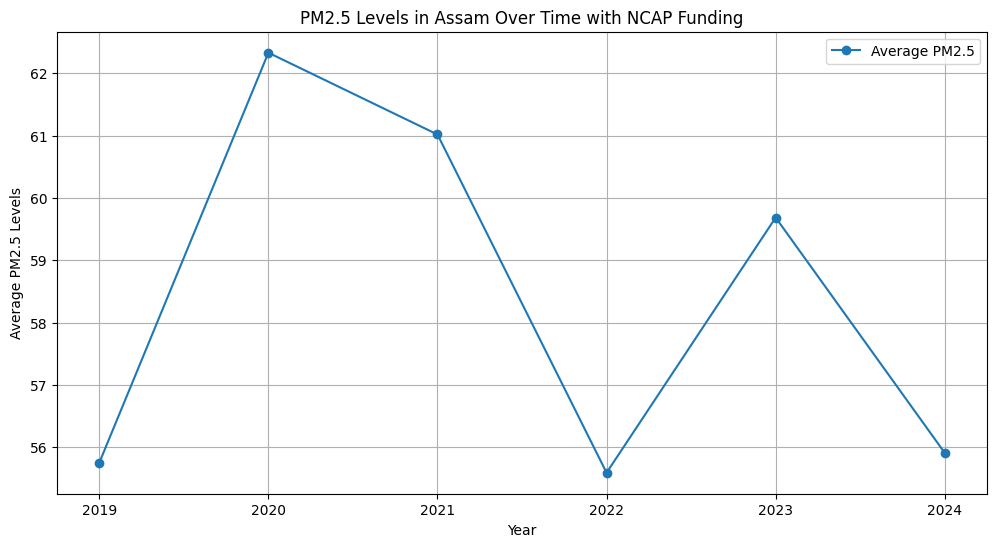


NCAP funding has not led to noticeable improvements in air quality in Assam.


In [177]:
# 2 Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

assam_data = data[data['state'] == 'Assam']
assam_avg_pm25 = assam_data.groupby(assam_data['Timestamp'].dt.year)['PM2.5'].mean().reset_index()
assam_avg_pm25.rename(columns={'Timestamp': 'year'}, inplace=True)

# Merge 
assam_funding = ncap_funding[ncap_funding['State'] == 'Assam']
assam_avg_pm25 = pd.merge(assam_avg_pm25, assam_funding, left_on='year', right_on='Total fund released', how='left')

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(assam_avg_pm25['year'], assam_avg_pm25['PM2.5'], label='Average PM2.5', marker='o')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.title('PM2.5 Levels in Assam Over Time with NCAP Funding')
plt.legend()
plt.grid(True)

for i, row in assam_avg_pm25.iterrows():
    if row['Total fund released'] > 0:
        plt.scatter(row['year'], row['PM2.5'], color='red', zorder=5)

plt.show()

# Analyze the impact of funding
if assam_avg_pm25['PM2.5'].iloc[-1] < assam_avg_pm25['PM2.5'].iloc[0]:
    print("\nNCAP funding has led to noticeable improvements in air quality in Assam.")
else:
    print("\nNCAP funding has not led to noticeable improvements in air quality in Assam.")

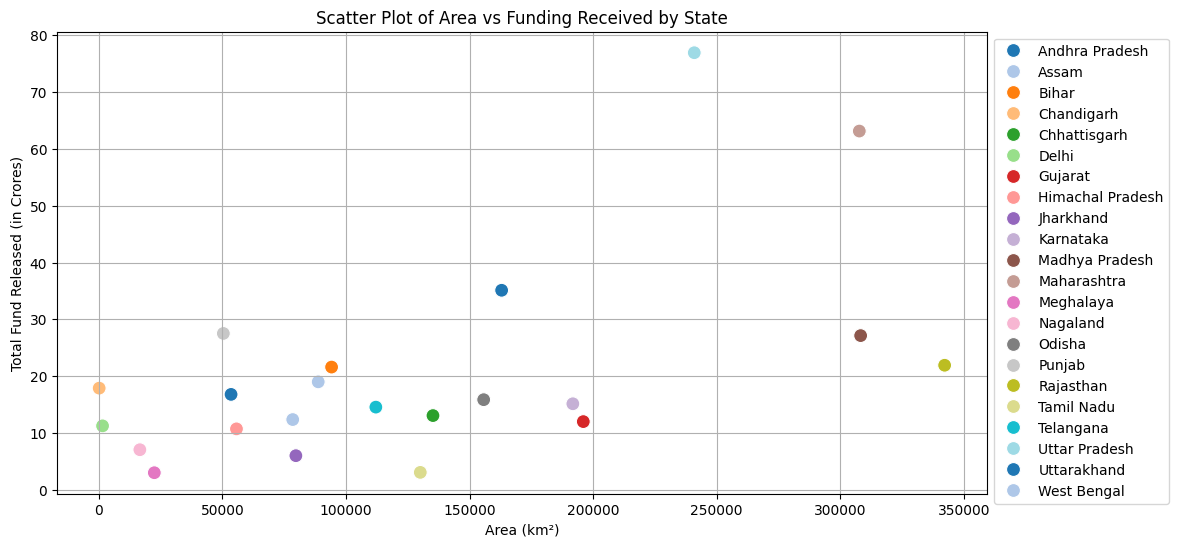

In [178]:
# 3 Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.
statefundingdata = ncap_funding.groupby('State')['Total fund released'].sum().reset_index()
combined = pd.merge(statefundingdata, state_data, left_on='State', right_on='State')
combined = combined.drop(columns=['Population'])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined, x="Area (km2)", y="Total fund released", hue="State", palette="tab20", s=100)
plt.xlabel("Area (km²)")
plt.ylabel("Total Fund Released (in Crores)")
plt.title("Scatter Plot of Area vs Funding Received by State")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

### Miscellaneous Questions 

In [179]:
# 1 For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)
city_avg_2023 = data[data['Timestamp'].dt.year == 2023].groupby('city')['PM2.5'].mean()
most_polluted_city = city_avg_2023.idxmax()
highest_avg = city_avg_2023.max()
city_data = data[(data['Timestamp'].dt.year == 2023) & (data['city'] == most_polluted_city)]
total_days = len(city_data)
hazardous_days = len(city_data[city_data['PM2.5'] > 300])
hazardous_percentage = (hazardous_days / total_days) * 100

print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Average PM2.5 level: {highest_avg:.2f} µg/m³")
print(f"Percentage of days with hazardous levels: {hazardous_percentage:.2f}%")
print(f"({hazardous_days} out of {total_days} days)")

Most polluted city in 2023: Darbhanga
Average PM2.5 level: 242.92 µg/m³
Percentage of days with hazardous levels: 0.82%
(3 out of 365 days)


C:\Users\Dhvani\AppData\Local\Temp\ipykernel_17136\701397007.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['period'] = delhi_data['Timestamp'].dt.month.map(


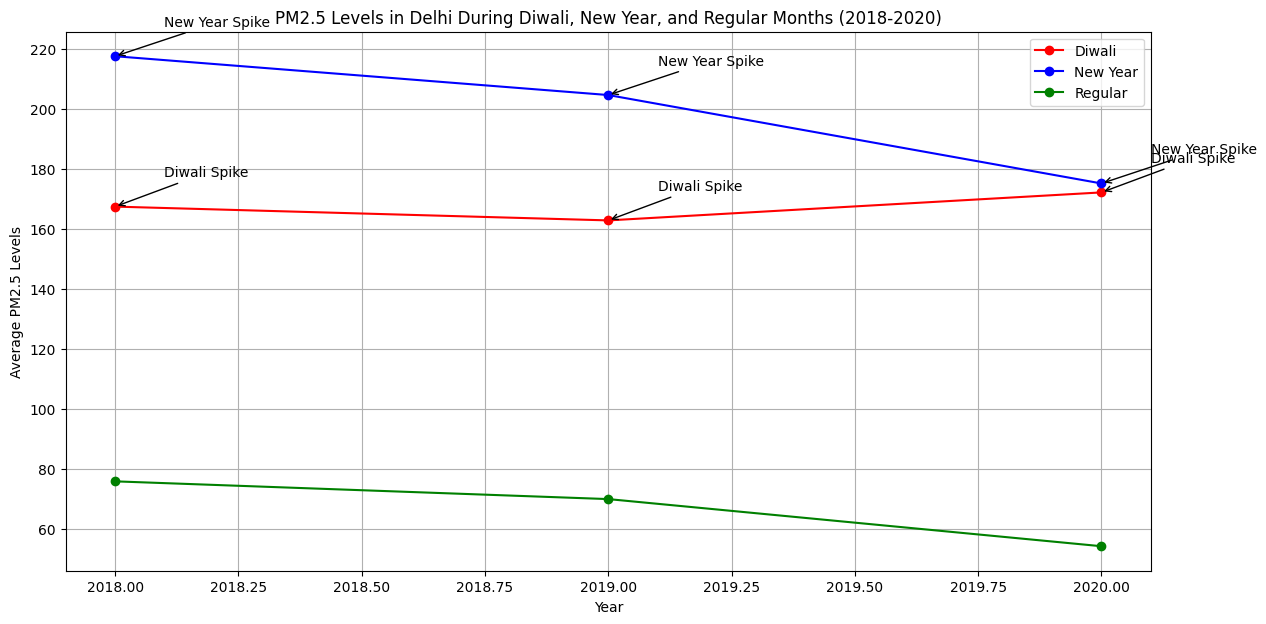

In [180]:
# 2 Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020).

delhi_data = data[(data['city'] == 'Delhi') & (data['Timestamp'].dt.year >= 2018) & (data['Timestamp'].dt.year <= 2020)]

# Define Diwali (Oct-Nov) and New Year (Dec-Jan) periods
delhi_data['period'] = delhi_data['Timestamp'].dt.month.map(
    lambda x: 'Diwali' if x in [10, 11] else ('New Year' if x in [12, 1] else 'Regular')
)
delhi_pm25_periods = delhi_data.groupby([delhi_data['Timestamp'].dt.year, 'period'])['PM2.5'].mean().reset_index()
delhi_pm25_periods.rename(columns={'Timestamp': 'Year'}, inplace=True)

# Plot
plt.figure(figsize=(14, 7))
colors = {'Diwali': 'red', 'New Year': 'blue', 'Regular': 'green'}

for period in ['Diwali', 'New Year', 'Regular']:
    period_data = delhi_pm25_periods[delhi_pm25_periods['period'] == period]
    plt.plot(period_data['Year'], period_data['PM2.5'], label=period, marker='o', color=colors[period])

# Mark spikes during Diwali and New Year
for year in [2018, 2019, 2020]:
    for period, color in [('Diwali', 'red'), ('New Year', 'blue')]:
        spike = delhi_pm25_periods[
            (delhi_pm25_periods['period'] == period) & (delhi_pm25_periods['Year'] == year)
        ].dropna().nlargest(1, 'PM2.5')

        if not spike.empty:
            plt.annotate(f'{period} Spike', xy=(spike['Year'].values[0], spike['PM2.5'].values[0]),
                         xytext=(spike['Year'].values[0] + 0.1, spike['PM2.5'].values[0] + 10),
                         arrowprops=dict(facecolor=color, arrowstyle='->'))

plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.title('PM2.5 Levels in Delhi During Diwali, New Year, and Regular Months (2018-2020)')
plt.legend()
plt.grid(True)
plt.show()



Festival Period Analysis (±7 days around festival):
--------------------------------------------------

Diwali 2018:
Maximum PM2.5: 349.2 µg/m³
Average PM2.5: 89.6 µg/m³
Days above hazardous level: 2

New Year 2019:
Maximum PM2.5: 561.4 µg/m³
Average PM2.5: 276.9 µg/m³
Days above hazardous level: 206

Diwali 2019:
Maximum PM2.5: 712.1 µg/m³
Average PM2.5: 233.4 µg/m³
Days above hazardous level: 157

New Year 2020:
Maximum PM2.5: 502.4 µg/m³
Average PM2.5: 241.8 µg/m³
Days above hazardous level: 131

Diwali 2020:
Maximum PM2.5: 699.0 µg/m³
Average PM2.5: 235.2 µg/m³
Days above hazardous level: 166

New Year 2021:
Maximum PM2.5: 414.5 µg/m³
Average PM2.5: 194.4 µg/m³
Days above hazardous level: 31


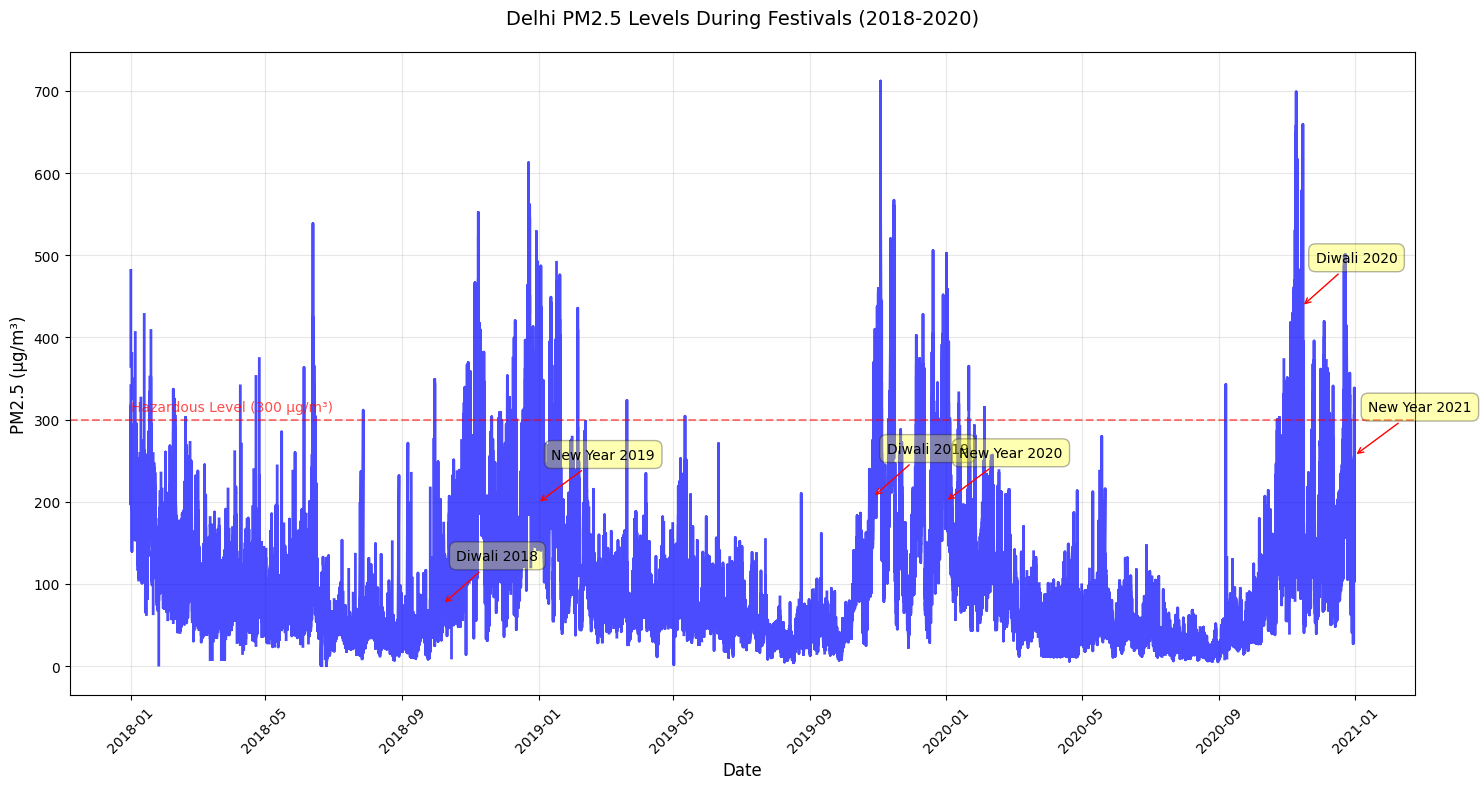

In [181]:
# 3 Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

delhi_data = data[(data['city'] == 'Delhi') & (data['Timestamp'].dt.year.between(2018, 2020))].copy()

# For better plotting
delhi_data['date'] = pd.to_datetime(delhi_data['Timestamp']) # Convert to Datetime
delhi_data = delhi_data.sort_values('date') # sort

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(delhi_data['date'], delhi_data['PM2.5'], 
        color='blue', alpha=0.7, linewidth=2)

# Define festival dates
festivals = {
    '2018-10-07': 'Diwali 2018',
    '2018-12-31': 'New Year 2019',
    '2019-10-27': 'Diwali 2019',
    '2019-12-31': 'New Year 2020',
    '2020-11-14': 'Diwali 2020',
    '2020-12-31': 'New Year 2021'
}

# Add festival markers and annotations
for date, festival in festivals.items():
    date = pd.to_datetime(date)
    # Find the PM2.5 value for this date
    value = delhi_data[delhi_data['date'] == date]['PM2.5'].values
    if len(value) > 0:
        value = value[0]
        # Add arrow and text
        ax.annotate(festival, 
                   xy=(date, value),
                   xytext=(10, 30),
                   textcoords='offset points',
                   ha='left',
                   va='bottom',
                   bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3),
                   arrowprops=dict(arrowstyle='->', color='red'))

# Customize the plot
ax.set_title('Delhi PM2.5 Levels During Festivals (2018-2020)', 
             fontsize=14, pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('PM2.5 (µg/m³)', fontsize=12)

# Add horizontal line for hazardous level
ax.axhline(y=300, color='red', linestyle='--', alpha=0.5)
ax.text(delhi_data['date'].iloc[0], 310, 'Hazardous Level (300 µg/m³)', 
        color='red', alpha=0.7)
plt.xticks(rotation=45)
ax.grid(True, alpha=0.3)
plt.tight_layout()

# Calculate statistics for festival periods
def get_festival_stats(data, festival_date, window_days=7):
    festival_date = pd.to_datetime(festival_date)
    window_before = festival_date - pd.Timedelta(days=window_days)
    window_after = festival_date + pd.Timedelta(days=window_days)
    
    festival_period = data[
        (data['date'] >= window_before) & 
        (data['date'] <= window_after)
    ]
    
    return {
        'max_pm25': festival_period['PM2.5'].max(),
        'mean_pm25': festival_period['PM2.5'].mean(),
        'days_above_hazardous': (festival_period['PM2.5'] > 300).sum()
    }

# Print analysis results
print("\nFestival Period Analysis (±7 days around festival):")
print("-" * 50)
for date, name in festivals.items():
    stats = get_festival_stats(delhi_data, date)
    print(f"\n{name}:")
    print(f"Maximum PM2.5: {stats['max_pm25']:.1f} µg/m³")
    print(f"Average PM2.5: {stats['mean_pm25']:.1f} µg/m³")
    print(f"Days above hazardous level: {stats['days_above_hazardous']}")

# Show plot
plt.show()


Sensor Distribution by State:
Maharashtra: 97 stations
Uttar Pradesh: 57 stations
Rajasthan: 46 stations
Karnataka: 42 stations
Delhi: 40 stations
Tamil Nadu: 36 stations
Bihar: 36 stations
Haryana: 32 stations
Madhya Pradesh: 29 stations
West Bengal: 22 stations
Odisha: 19 stations
Gujarat: 17 stations
Chhattisgarh: 14 stations
Telangana: 14 stations
Andhra Pradesh: 13 stations
Kerala: 9 stations
Assam: 9 stations
Punjab: 8 stations
Jharkhand: 4 stations
Chandigarh: 3 stations
Uttarakhand: 3 stations
Tripura: 2 stations
Manipur: 2 stations
Meghalaya: 2 stations
Himachal Pradesh: 1 stations
Arunachal Pradesh: 1 stations
Puducherry: 1 stations
Nagaland: 1 stations
Jammu and Kashmir: 1 stations
Mizoram: 1 stations
Sikkim: 1 stations


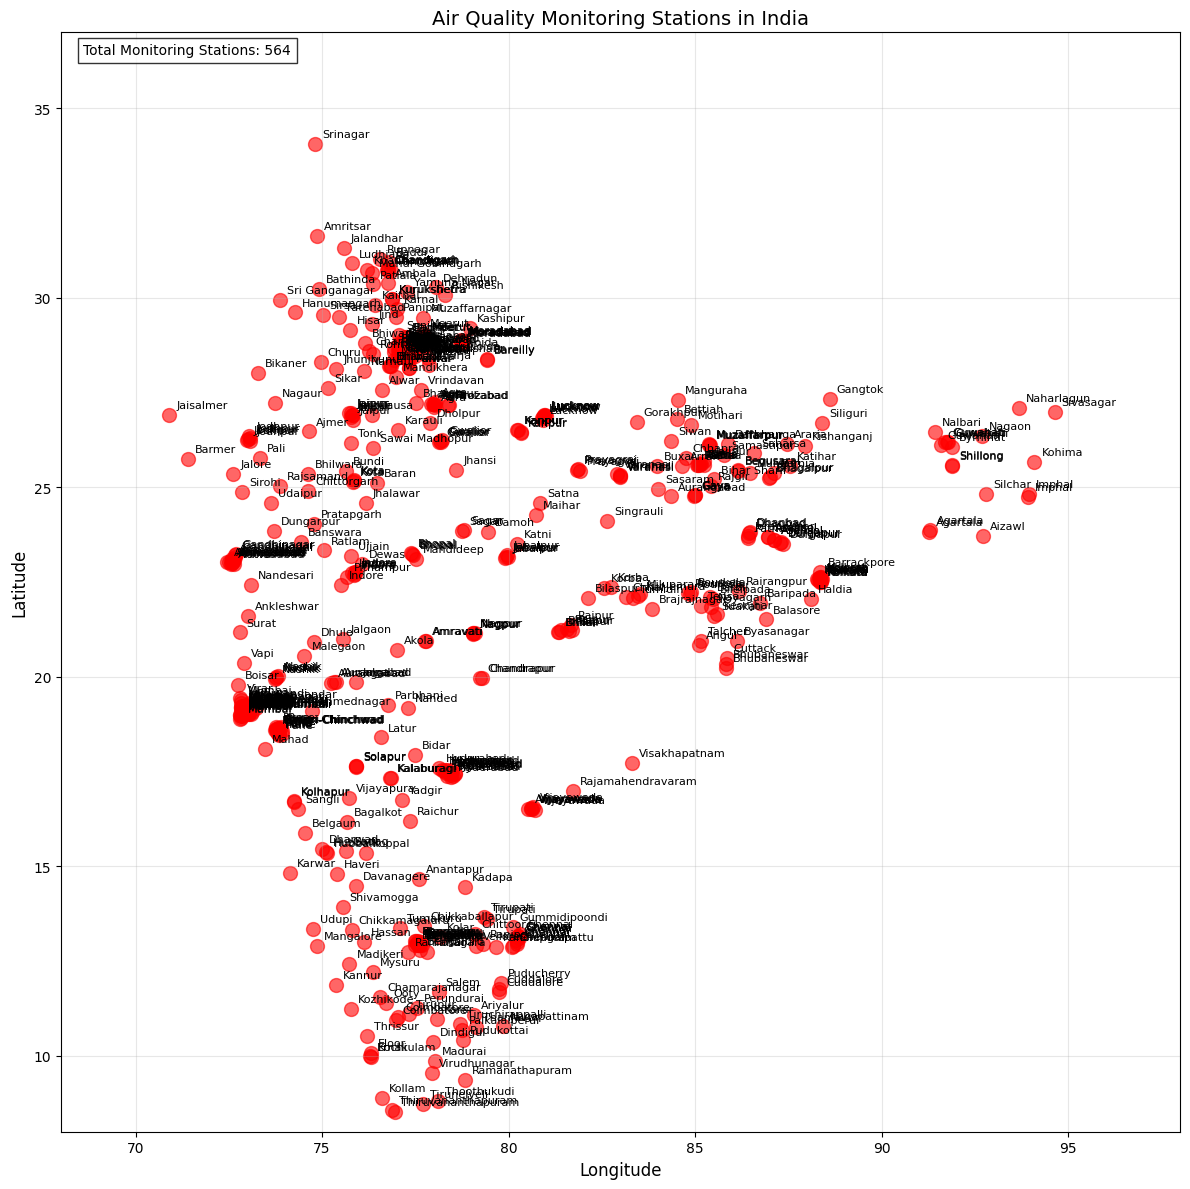

In [182]:
# 4 Draw the map of India and plot the sensor locations on the map.

plt.figure(figsize=(12, 12))

# Get unique sensor locations to avoid duplicates
unique_locations = data[['latitude', 'longitude', 'city', 'state']].drop_duplicates()

plt.scatter(unique_locations['longitude'], 
           unique_locations['latitude'], 
           c='red', 
           alpha=0.6, 
           s=100)

# Add labels for major cities
for idx, row in unique_locations.iterrows():
    plt.annotate(row['city'], 
                (row['longitude'], row['latitude']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8)

plt.title('Air Quality Monitoring Stations in India', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Set map bounds to focus on India
plt.xlim(68, 98)
plt.ylim(8, 37)
plt.grid(True, alpha=0.3)

# Add text showing total number of stations
plt.text(0.02, 0.98, 
         f'Total Monitoring Stations: {len(unique_locations)}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

# Print statistics
print("\nSensor Distribution by State:")
state_counts = unique_locations['state'].value_counts()
for state, count in state_counts.items():
    print(f"{state}: {count} stations")

plt.tight_layout()
plt.show()

### Tell us something new 


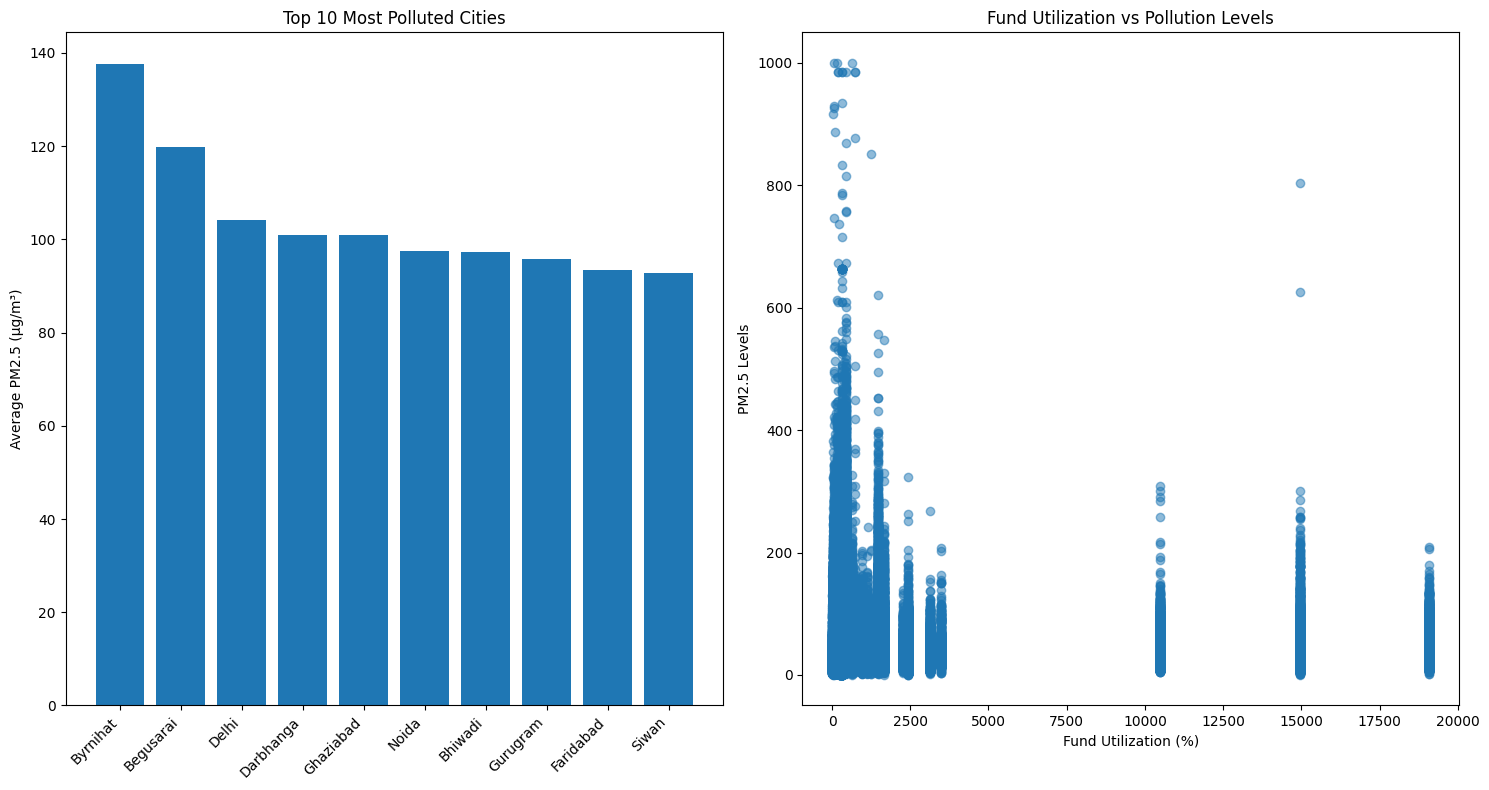


Key Findings for Policymakers:

1. City Pollution Rankings:
   Top 5 most polluted cities and their average PM2.5 levels:
   - Byrnihat: 137.5 µg/m³
   - Begusarai: 119.8 µg/m³
   - Delhi: 104.1 µg/m³
   - Darbhanga: 101.0 µg/m³
   - Ghaziabad: 100.9 µg/m³

2. NCAP Fund Utilization:
   - Average fund utilization: 1244.6%
   - Cities with highest fund utilization:
   - Visakhapatnam: 19091.7%
   - Aurangabad: 14960.0%
   - Nashik: 14960.0%
   - Indore: 10480.0%
   - Jalgaon: 3479.1%


In [183]:
# Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

fig = plt.figure(figsize=(15, 8))
# 1. Correlation between City Population and Pollution
city_avg_pollution = data.groupby('city')['PM2.5'].mean().sort_values(ascending=False)
top_10_polluted = city_avg_pollution.head(10)

# Plot
ax = plt.subplot(1, 2, 1)
ax.bar(range(len(top_10_polluted)), top_10_polluted)
ax.set_xticks(range(len(top_10_polluted)))
ax.set_xticklabels(top_10_polluted.index, rotation=45, ha='right')
ax.set_title('Top 10 Most Polluted Cities')
ax.set_ylabel('Average PM2.5 (µg/m³)')

# 2. NCAP Fund Utilization vs Pollution Reduction
funded_cities = pd.merge(data, ncap_funding, left_on=['city'], right_on=['City'], how='inner')
funded_cities['Utilisation as on June 2022'] = pd.to_numeric(funded_cities['Utilisation as on June 2022'], errors='coerce')
funded_cities['Total fund released'] = pd.to_numeric(funded_cities['Total fund released'], errors='coerce')
funded_cities['utilization_percent'] = ((funded_cities['Utilisation as on June 2022'] / funded_cities['Total fund released']) * 100)

# Plot
ax1 = plt.subplot(1, 2, 2)
ax1.scatter(funded_cities['utilization_percent'], funded_cities['PM2.5'], alpha=0.5)
ax1.set_xlabel('Fund Utilization (%)')
ax1.set_ylabel('PM2.5 Levels')
ax1.set_title('Fund Utilization vs Pollution Levels')

plt.tight_layout()
plt.show()

print("\nKey Findings for Policymakers:")

# 1. City Pollution Rankings
print("\n1. City Pollution Rankings:")
print("   Top 5 most polluted cities and their average PM2.5 levels:")
for city, level in city_avg_pollution.head().items():
    print(f"   - {city}: {level:.1f} µg/m³")

# 2. NCAP Fund Utilization
avg_utilization = funded_cities['utilization_percent'].mean()
print(f"\n2. NCAP Fund Utilization:")
print(f"   - Average fund utilization: {avg_utilization:.1f}%")
print(f"   - Cities with highest fund utilization:")
top_utilized = funded_cities.groupby('City')['utilization_percent'].mean().sort_values(ascending=False).head()
for city, util in top_utilized.items():
    print(f"   - {city}: {util:.1f}%")
